<a href="https://colab.research.google.com/github/vrathi101/SIGCOMMInclusivity/blob/main/SIGCOMMData_Finalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install and import libraries which will be used
!pip install ipywidgets
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns

In [ ]:
#read the csv of the latest version of the dataframe which has been updated throughout the Google Colabs
from google.colab import drive
drive.mount('/content/gdrive')
proj_path = '/content/gdrive/MyDrive/Colab Notebooks/save_data/'
dfSigcomm = pd.read_csv(proj_path + 'PublisherNamesAdjusted.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Filling in the dataframe Gender column based on the columns DirectMatch, FuzzyMatching, and GenderGuesser which receive priority in the order listed.

In [ ]:
#create an empty Gender column
dfSigcomm['Gender']=''

#GenderFullNameMatch checked first
dfSigcomm['Gender'] = dfSigcomm['Gender'].replace('', np.nan)
dfSigcomm['Gender'] = dfSigcomm['Gender'].fillna(dfSigcomm['DirectMatch'])

#FuzzyMatching checked second
dfSigcomm['Gender'] = dfSigcomm['Gender'].fillna(dfSigcomm['FuzzyMatch'])
dfSigcomm

#GenderPython checked third
#dfSigcomm['Gender'] = dfSigcomm['Gender'].fillna(np.nan)
dfSigcomm['Gender'] = dfSigcomm['Gender'].fillna(dfSigcomm['GenderGuesser'])
dfSigcomm['Gender'] = dfSigcomm['Gender'].replace(['male', 'mostly_male'], 'Male')
dfSigcomm['Gender'] = dfSigcomm['Gender'].replace(['female', 'mostly_female'], 'Female')
dfSigcomm['Gender'] = dfSigcomm['Gender'].replace(['andy', 'unknown'], 'Unknown')

Determining the method used to find gender based on which columns had empty values vs. non-empty values.

In [ ]:
dfSigcomm['Source'] = ''
for index, row in dfSigcomm.iterrows():
  # if column A is nonempty, fill in Source (method) with column A method name
  if not pd.isnull(row['DirectMatch']):
    dfSigcomm.loc[index, 'Source'] = 'FullNameMatch'
  # if column A is empty and column B is nonempty, fill in Source with column B method name
  elif pd.isnull(row['DirectMatch']) and pd.notna(row['FuzzyMatch']):
    dfSigcomm.loc[index, 'Source'] = 'FuzzyMatch'
  # if column A is empty, column B is empty, fill in Source with column C method name
  else:
    dfSigcomm.loc[index, 'Source'] = 'GenderGuesser'
pd.reset_option('display.max_rows')
dfSigcomm.head(10)

,name,year,committee,region,cleanedName,cleanedRegion,Continent,DirectMatch,FuzzyMatch,GenderGuesser,Gender,Source
0,Pablo Rodriguez,2009,Organizing,"Telefonica Research, Spain",Pablo Rodriguez,"Telefonica Research, Spain",Europe,NaN,Male,male,Male,FuzzyMatch
1,Ernst Biersack,2009,Organizing,"Eurecom, France",Ernst Biersack,"Eurecom, France",Europe,NaN,Male,male,Male,FuzzyMatch
2,Konstantina Papagiannaki,2009,Organizing,"Intel Labs Pittsburgh, USA",Konstantina Papagiannaki,"Intel Labs Pittsburgh, USA",North America,NaN,Female,female,Female,FuzzyMatch
3,Luigi Rizzo,2009,Organizing,"Universit� di Pisa, Italy",Luigi Rizzo,"Universit di Pisa, Italy",Europe,Male,Male,male,Male,FullNameMatch
4,Christophe Diot,2009,Organizing,"Thomson, France",Christophe Diot,"Thomson, France",Europe,Male,Male,male,Male,FullNameMatch
5,Dolors Sala,2009,Organizing,"Universitat Pompeu Fabra, Spain",Dolors Sala,"Universitat Pompeu Fabra, Spain",Europe,NaN,NaN,female,Female,GenderGuesser
6,Jaudelice de Oliveira,2009,Organizing,"Drexel University, USA",Jaudelice de Oliveira,"Drexel University, USA",North America,Female,Female,unknown,Female,FullNameMatch
7,Balachander Krishnamurthy,2009,Organizing,AT&T Labs,Balachander Krishnamurthy,AT&T Labs,North America,Male,Male,unknown,Male,FullNameMatch
8,Ant Rowstron,2009,Organizing,"Microsoft Research, UK",Ant Rowstron,"Microsoft Research, UK",Europe,NaN,NaN,male,Male,GenderGuesser
9,Laurent Mathy,2009,Organizing,"Lancaster University, UK",Laurent Mathy,"Lancaster University, UK",Europe,Male,Male,male,Male,FullNameMatch


We write the current dataframe into a CSV file.

In [ ]:
dfSigcomm.to_csv("/content/gdrive/My Drive/Colab Notebooks/save_data/PublisherNamesFinal.csv", sep=',', index=False, encoding='utf-8')

Adding interactivity to the dataframe so users can organize or visualize the dataframe in different ways, using ipywidgets.

In [ ]:
#FILTERING
column_dropdown = widgets.Dropdown(options=dfSigcomm.columns)
value_input = widgets.Text(placeholder="Enter value")
def apply_filter(column, value):
  filtered_df = dfSigcomm[dfSigcomm[column] == value]
  display(filtered_df)
widgets.interact(apply_filter, column=column_dropdown, value=value_input)

interactive(children=(Dropdown(description='column', options=('name', 'year', 'committee', 'region', 'cleanedN…

<function __main__.apply_filter(column, value)>

In [ ]:
#SORTING
sort_button = widgets.Button(description='Sort')
def sort_dataframe(_):
  column = column_dropdown.value
  df_sorted = dfSigcomm.sort_values(by=column)
  display(df_sorted)
sort_button.on_click(sort_dataframe)
widgets.VBox([column_dropdown, sort_button])

In [ ]:
#AGGREGATING
aggregation_dropdown = widgets.Dropdown(options=['sum', 'mean', 'count'])
aggregate_button = widgets.Button(description='Aggregate')
def aggregate_dataframe(_):
  column = column_dropdown.value
  aggregation = aggregation_dropdown.value
  result = dfSigcomm.groupby(column)[column].agg(aggregation)
  display(result)
aggregate_button.on_click(aggregate_dataframe)
widgets.VBox([column_dropdown, aggregation_dropdown, aggregate_button])

In [ ]:
#PIVOT TABLES (2 columns)
column1_dropdown = widgets.Dropdown(options=list(dfSigcomm.columns))
column2_dropdown = widgets.Dropdown(options=list(dfSigcomm.columns))
count_button = widgets.Button(description='Count')
def count_columns(_):
  column1 = column1_dropdown.value
  column2 = column2_dropdown.value
  counts = pd.crosstab(dfSigcomm[column1], dfSigcomm[column2])
  display(counts)
count_button.on_click(count_columns)
widgets.VBox([column1_dropdown, column2_dropdown, count_button])

In [ ]:
#PIVOT TABLES (any number of columns)
column_checkboxes = [widgets.Checkbox(description=col, value=False) for col in dfSigcomm.columns]
count_button = widgets.Button(description='Count')
def count_columns(_):
    selected_columns = [checkbox.description for checkbox in column_checkboxes if checkbox.value]
    if len(selected_columns) < 2:
        print("Please select at least two columns.")
        return
    counts = dfSigcomm.groupby(selected_columns).size().reset_index(name='Count')
    display(counts)
count_button.on_click(count_columns)
widgets.VBox([widgets.HBox(column_checkboxes), count_button])

In [ ]:
#PLOTTING
x_dropdown = widgets.Dropdown(options=list(dfSigcomm.columns))
y_dropdown = widgets.Dropdown(options=list(dfSigcomm.columns))
plot_button = widgets.Button(description='Plot')
def create_plot(_):
    x_column = x_dropdown.value
    y_column = y_dropdown.value
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dfSigcomm, x=x_column, hue=y_column)
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.legend(title=y_column)
    plt.show()
plot_button.on_click(create_plot)
widgets.VBox([x_dropdown, y_dropdown, plot_button])

Making graphs showing the changes of gender distribution (as a percentage and as a count) for each of the two committee types over the 15-year span.

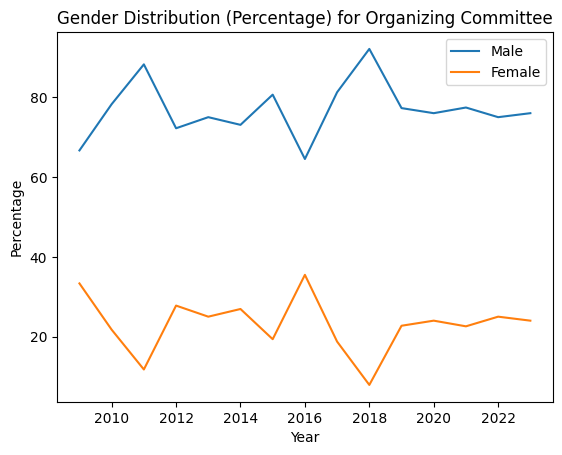

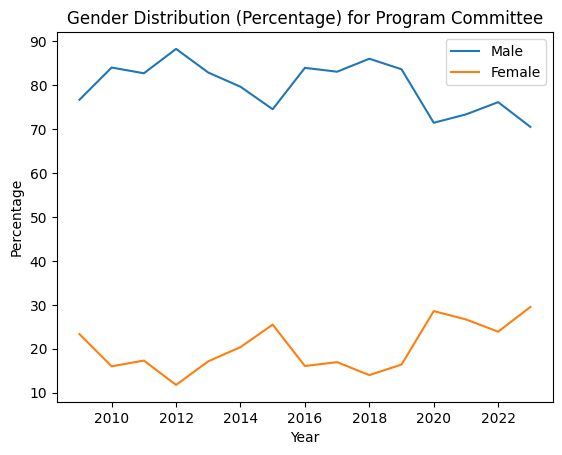

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

# Get unique continent values from the "Continent" column
genders = dfSigcomm['Gender'].unique()

# Create separate line graphs for each committee
for committee in committees:
    # Create a figure and axis for the current committee
    fig, ax = plt.subplots()

    # Loop through each continent
    for gender in genders:
        # Create an empty list to store the percentages for each year
        percentages = []

        # Loop through each year
        for year in years:
            # Filter the DataFrame for the current committee, continent, and year
            df_filtered = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['Gender'] == gender) & (dfSigcomm['year'] == year)]

            # Get the count of members for the current continent and year
            count = len(df_filtered)

            # Calculate the percentage by dividing the count by the total count for the committee and year
            total_count = len(dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['year'] == year)])
            percentage = (count / total_count) * 100

            # Append the percentage to the list
            percentages.append(percentage)

        # Plot the percentages as a line graph for the current continent
        ax.plot(years, percentages, label=gender)

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Gender Distribution (Percentage) for {committee} Committee')
    ax.legend()

    # Display the plot
    plt.show()

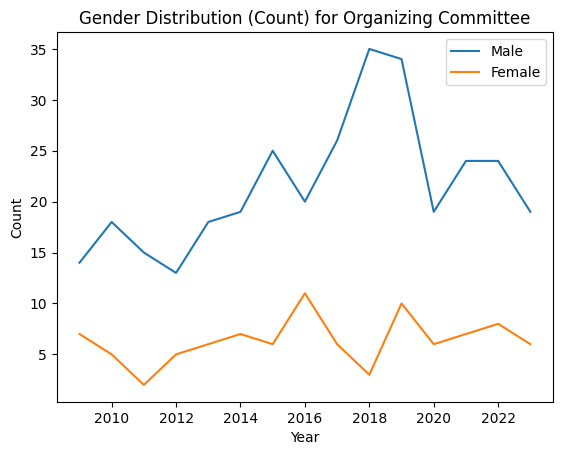

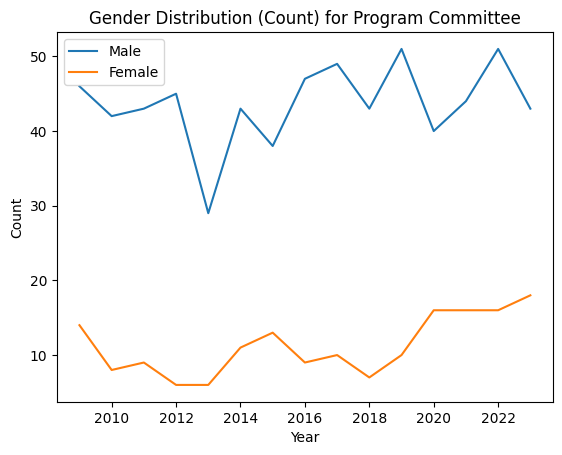

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

# Get unique continent values from the "Continent" column
genders = dfSigcomm['Gender'].unique()

# Create separate line graphs for each committee
for committee in committees:
    # Create a figure and axis for the current committee
    fig, ax = plt.subplots()

    # Loop through each continent
    for gender in genders:
        # Create an empty list to store the counts for each year
        counts = []

        # Loop through each year
        for year in years:
            # Filter the DataFrame for the current committee, continent, and year
            df_filtered = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['Gender'] == gender) & (dfSigcomm['year'] == year)]

            # Get the count of members for the current continent and year
            count = len(df_filtered)

            # Append the count to the list
            counts.append(count)

        # Plot the counts as a line graph for the current continent
        ax.plot(years, counts, label=gender)

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_title(f'Gender Distribution (Count) for {committee} Committee')
    ax.legend()

    # Display the plot
    plt.show()

Making graphs showing the changes of geographic distribution (as a percentage and as a count) for each of the two committee types over the 15-year span.

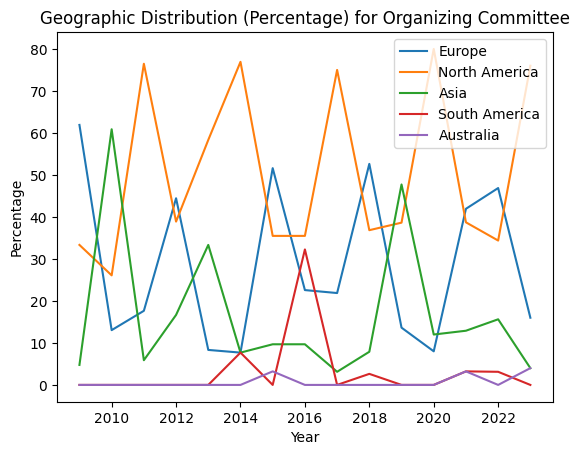

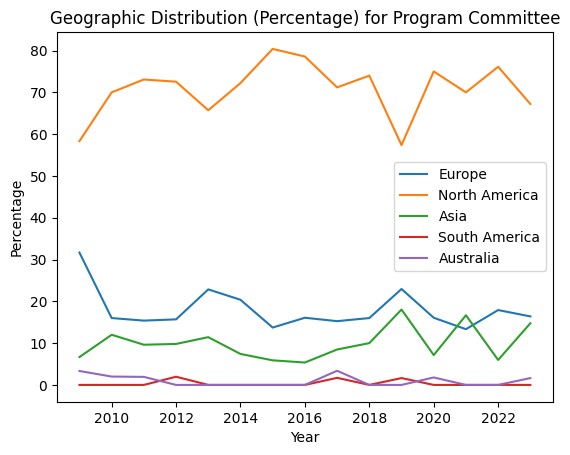

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

# Get unique continent values from the "Continent" column
continents = dfSigcomm['Continent'].unique()

# Create separate line graphs for each committee
for committee in committees:
    # Create a figure and axis for the current committee
    fig, ax = plt.subplots()

    # Loop through each continent
    for continent in continents:
        # Create an empty list to store the percentages for each year
        percentages = []

        # Loop through each year
        for year in years:
            # Filter the DataFrame for the current committee, continent, and year
            df_filtered = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['Continent'] == continent) & (dfSigcomm['year'] == year)]

            # Get the count of members for the current continent and year
            count = len(df_filtered)

            # Calculate the percentage by dividing the count by the total count for the committee and year
            total_count = len(dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['year'] == year)])
            percentage = (count / total_count) * 100

            # Append the percentage to the list
            percentages.append(percentage)

        # Plot the percentages as a line graph for the current continent
        ax.plot(years, percentages, label=continent)

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Geographic Distribution (Percentage) for {committee} Committee')
    ax.legend()

    # Display the plot
    plt.show()

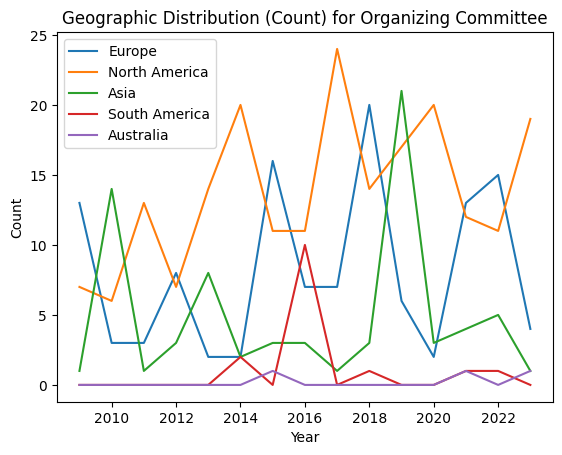

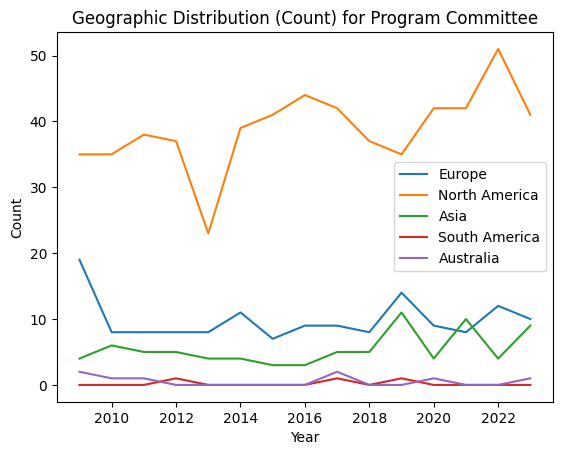

In [ ]:
# Get unique committee and year values from the DataFrame
committees = dfSigcomm['committee'].unique()
years = dfSigcomm['year'].unique()

# Get unique continent values from the "Continent" column
continents = dfSigcomm['Continent'].unique()

# Create separate line graphs for each committee
for committee in committees:
    # Create a figure and axis for the current committee
    fig, ax = plt.subplots()

    # Loop through each continent
    for continent in continents:
        # Create an empty list to store the counts for each year
        counts = []

        # Loop through each year
        for year in years:
            # Filter the DataFrame for the current committee, continent, and year
            df_filtered = dfSigcomm[(dfSigcomm['committee'] == committee) & (dfSigcomm['Continent'] == continent) & (dfSigcomm['year'] == year)]

            # Get the count of members for the current continent and year
            count = len(df_filtered)

            # Append the count to the list
            counts.append(count)

        # Plot the counts as a line graph for the current continent
        ax.plot(years, counts, label=continent)

    # Configure the plot
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_title(f'Geographic Distribution (Count) for {committee} Committee')
    ax.legend()

    # Display the plot
    plt.show()

In [ ]:
dfSigcomm.to_html('dataframe.html')

In [ ]:
!pip install flask-ngrok
!pip install pyngrok==5.0.0

In [ ]:
from flask import Flask, render_template
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def index():
    # Render the HTML template and pass the DataFrame as a variable
    return render_template('index.html', dataframe=dfSigcomm.to_html())



<!DOCTYPE html>
<html>
<head>
    <title>Interactive DataFrame</title>
</head>
<body>
    <!-- Display the DataFrame in a table -->
    {{ dataframe | safe }}
</body>
</html>


In [ ]:
if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packag

In [ ]:
!npm install -g localtunnel
!npm install -g npm

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
updated 1 package in 2.333s
/tools/node/bin/npm -> /tools/node/lib/node_modules/npm/bin/npm-cli.js
/tools/node/bin/npx -> /tools/node/lib/node_modules/npm/bin/npx-cli.js
npm WARN notsup Unsupported engine for npm@9.7.2: wanted: {"node":"^14.17.0 || ^16.13.0 || >=18.0.0"} (current: {"node":"14.16.0","npm":"6.14.8"})
npm WARN notsup Not compatible with your version of node/npm: npm@9.7.2

+ npm@9.7.2
added 108 packages from 31 contributors, removed 293 packages and updated 141 packages in 14.521s


In [ ]:
# Start running your Flask application in Google Colab
if __name__ == '__main__':
    app.run()  # Make sure Flask is listening on port 5000
!lt --port 5000


In [ ]:
!pip install streamlit
import pandas as pd
import streamlit as st

In [ ]:
import os

# Specify the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/ResearchProject/SIGCOMMData_Finalization.py'

# Check if the file exists
if os.path.exists(file_path):
    # Run the Streamlit app
    !streamlit run --server.port 8000 "$file_path"
else:
    print("File not found.")


File not found.
